In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
((X_train, y_train), (X_test, y_test)) = keras.datasets.mnist.load_data()


In [32]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

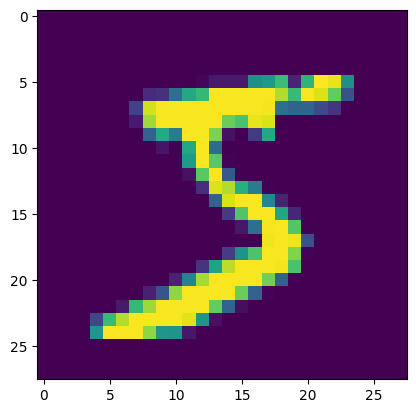

In [6]:
plt.imshow(X_train[0])
plt.show()

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
#Scale the Values is required to train properly
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # fixed typo
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 971us/step - loss: 0.4708 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 782us/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.2727 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 872us/step - loss: 0.2669 - accuracy: 0.9253


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 886us/step - loss: 0.2676 - accuracy: 0.9257


[0.26759955286979675, 0.9257000088691711]

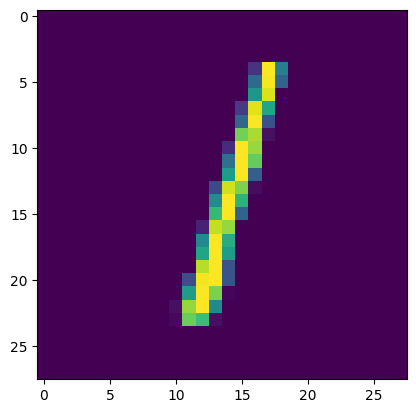

In [14]:
plt.imshow(X_test[2])
plt.show()


In [15]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 562us/step


In [16]:
y_predicted[1]

array([3.4027514e-01, 2.7563495e-03, 9.9934030e-01, 2.4634685e-01,
       3.5777606e-10, 7.7029437e-01, 8.5204202e-01, 6.2722126e-13,
       1.3304713e-01, 2.3852227e-09], dtype=float32)

In [17]:
np.argmax(y_predicted[2]) # kiska score jyada h 


1

In [18]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    6,    5,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   5,    8,  926,   16,   10,    5,   12,   10,   36,    4],
       [   3,    0,   19,  928,    0,   23,    2,   10,   16,    9],
       [   1,    1,    2,    2,  908,    0,   12,    4,    7,   45],
       [   8,    2,    3,   33,   10,  778,   14,    7,   29,    8],
       [  11,    3,    7,    1,    7,   15,  911,    2,    1,    0],
       [   1,    5,   23,    6,   10,    0,    0,  943,    2,   38],
       [   8,    7,    8,   27,    9,   28,    9,   11,  852,   15],
       [  11,    7,    1,    9,   18,    6,    0,   15,    5,  937]])>

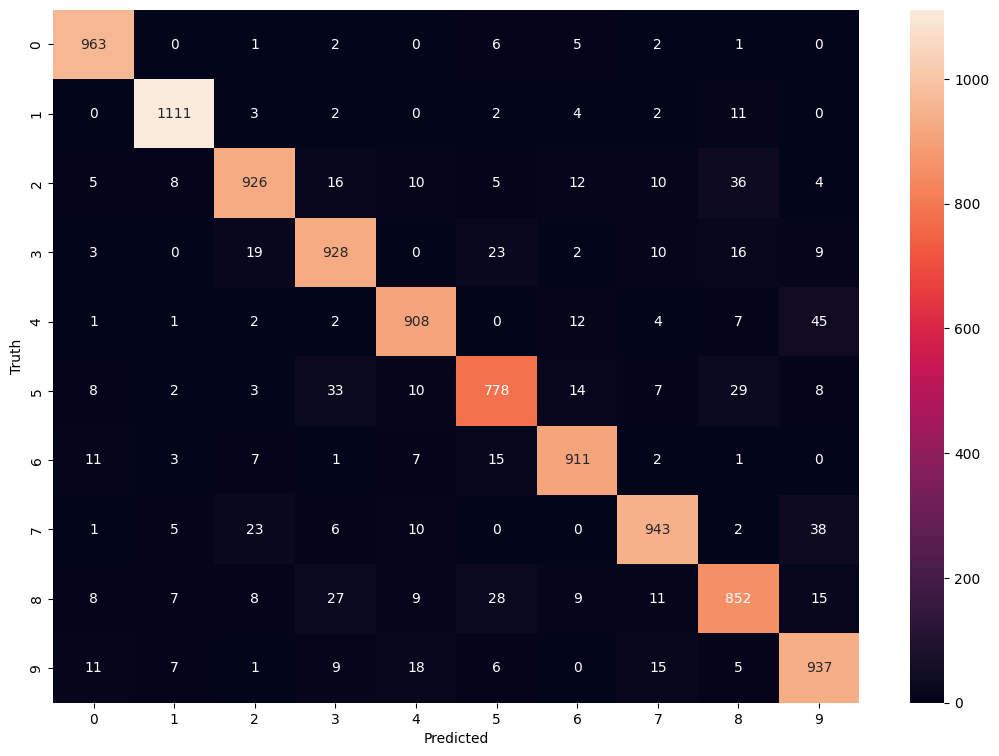

In [21]:
import seaborn as sns
plt.figure(figsize=(13,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [22]:
#add hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #100 - no of neuros
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # fixed typo
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2426 - accuracy: 0.9295
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1036 - accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0712 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0561 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0436 - accuracy: 0.9855


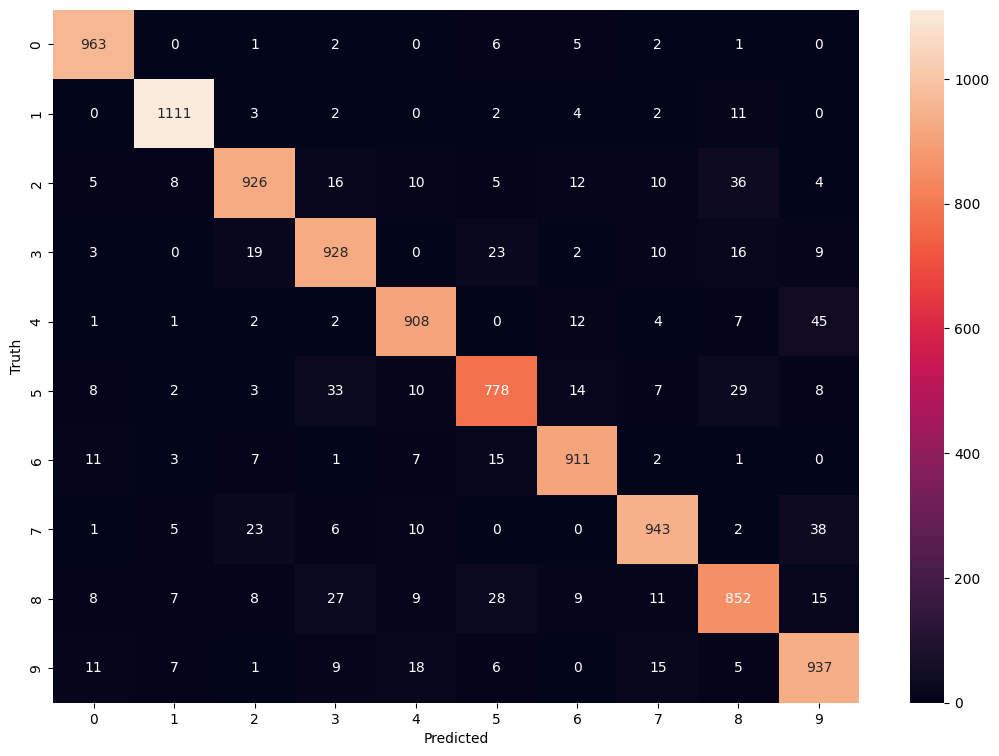

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(13,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [24]:
#add hidden layer without flattened
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(100, activation='relu'), #100 - no of neuros
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # fixed typo
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10)

In [25]:
# model.evaluate(X_test, y_test)

In [26]:
# y_predicted = model.predict(X_test)
# y_predicted_labels = [np.argmax(i) for i in y_predicted]
# cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
# plt.figure(figsize=(13,9))
# sns.heatmap(cm,annot=True,fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

# plt.show()

In [27]:
#TensorBoard
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #100 - no of neuros
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/sgd", histogram_freq=1)
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',  # fixed typo
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6299 - accuracy: 0.8364
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2959 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2453 - accuracy: 0.9292
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2106 - accuracy: 0.9388
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1858 - accuracy: 0.9460


In [28]:
#Launching Tensorboard

In [29]:
%reload_ext tensorboard
%tensorboard --logdir "C:/Users/robby/Tensorflow 2.o/logs/"


Reusing TensorBoard on port 6008 (pid 25576), started 1 day, 0:30:15 ago. (Use '!kill 25576' to kill it.)